In [ ]:
# From https://medium.com/@dnemutlu/hierarchical-clustering-of-images-with-python-f99e92855069

In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.feature import hog
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram,linkage

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

imgPath="D:/dnld/media/ipsoot/"

In [2]:
imgsName=[imgPath+imgFo.name for imgFo in os.scandir(imgPath)]
imgs=[rgb2gray(imread(imgPath+imgFo.name)) for imgFo in os.scandir(imgPath)]

n_imgs=len(imgs)

imgsResized=[resize(img,(500,500)) for img in imgs]

del imgs

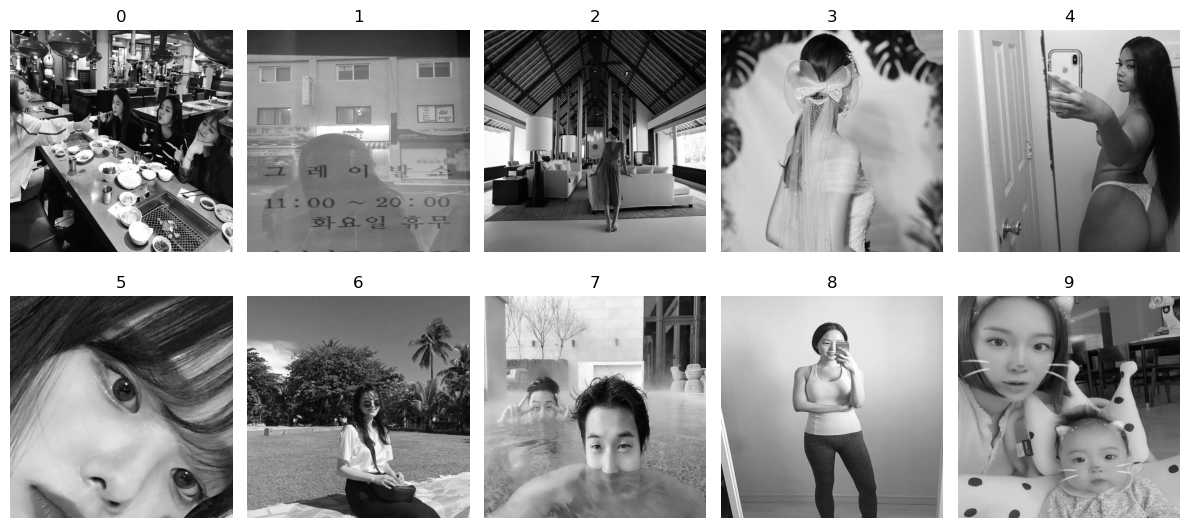

In [3]:
fig=plt.figure(figsize=(12,6))

for q in range(10):
    fig.add_subplot(2,5,q+1)
    plt.imshow(imgsResized[q],cmap="gray")
    plt.title(q)
    plt.axis("off")
    plt.tight_layout()

In [4]:
features=[]

for q in range(n_imgs):
    feature=hog(
        imgsResized[q],
        orientations=9,
        pixels_per_cell=(16,16),
        cells_per_block=(2,2),
        channel_axis=None,
        visualize=False,
    )

    features.append(feature)

In [5]:
# (n_blocks_row, n_blocks_col, n_cells_row, n_cells_col, n_orient)
print(features[0].shape)
print(features[0])

(32400,)
[0.11360801 0.04157278 0.0375725  ... 0.36723947 0.30040649 0.22419522]


In [6]:
distances=np.zeros((n_imgs,n_imgs))

for q in range(n_imgs):
    featureX=features[q]
    for w in range(n_imgs):
        featureY=features[w]
        distances[q,w]=distance.jensenshannon(featureX,featureY)

In [20]:
all(np.maximum(distances,distances.transpose())[-1]==distances[-1])

True

In [21]:
distancesArray=distance.squareform(distances)

In [27]:
links=linkage(distancesArray,method="ward")
links

array([[6.46000000e+02, 8.06000000e+02, 1.70824646e-01, 2.00000000e+00],
       [7.40000000e+02, 9.36000000e+02, 1.75574594e-01, 2.00000000e+00],
       [1.00600000e+03, 1.00700000e+03, 1.83429141e-01, 4.00000000e+00],
       ...,
       [1.99800000e+03, 2.00300000e+03, 1.22458929e+00, 7.34000000e+02],
       [2.00600000e+03, 2.00700000e+03, 1.49565059e+00, 2.72000000e+02],
       [2.00800000e+03, 2.00900000e+03, 1.94739806e+00, 1.00600000e+03]])

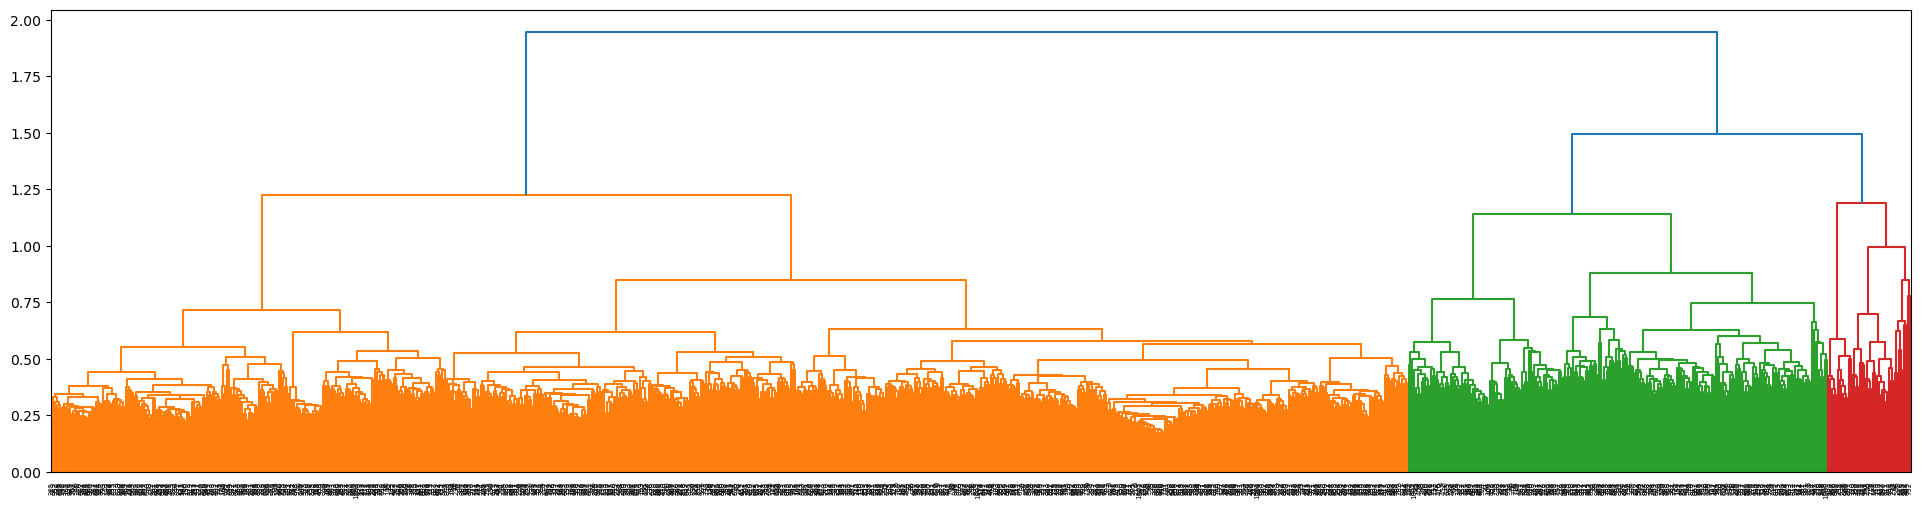

In [29]:
plt.figure(figsize=(24,6))
l=dendrogram(links,show_leaf_counts=True)

In [37]:
imgsName=[imgPath+imgFo.name for imgFo in os.scandir(imgPath)]

In [38]:
[imgsName[int(q)] for q in l["ivl"][:10]]

['D:/dnld/media/ipsoot/66320704_1123997261133887_6027698608811716674_n.jpg',
 'D:/dnld/media/ipsoot/66404158_131306561432742_441202263340265038_n.jpg',
 'D:/dnld/media/ipsoot/67942507_730226494077881_3022006225761112370_n.jpg',
 'D:/dnld/media/ipsoot/66285908_3076854395720132_8214182273797517029_n.jpg',
 'D:/dnld/media/ipsoot/66394105_965115717162753_2926018481855734644_n.jpg',
 'D:/dnld/media/ipsoot/67032272_158884355255674_1262830373147615341_n.jpg',
 'D:/dnld/media/ipsoot/66289765_877157992663001_8089448030079537806_n.jpg',
 'D:/dnld/media/ipsoot/66478491_380976299228937_4125159517972550703_n.jpg',
 'D:/dnld/media/ipsoot/66063774_153274249065199_4316063057223705318_n.jpg',
 'D:/dnld/media/ipsoot/66149998_2087013854928293_1936785244923391177_n.jpg']